### Mall Customer Segmentation

Customer segmentation is the activity of grouping customers into different groups based on common characteristics such as age, gender, annual income, place of residence, purchase frequency, and others.The results of this market segmentation analysis will be very useful for business actors in determining policies based on the character of each customer segment.

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . 
this Process using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Import Library

In [90]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Here is a brief description of each column:

Customer ID is a special number used as a representation of each customer. So each customer has their own ID and is different from each other. From the print table above, it can be seen that there are 200 customers in this mall customer dataset,
Gender. In this dataset there are only two types of gender, namely Male and Female.
Age: age (in years)
Annual Income in thousands of dollars.
Spending score. Is an integer number (1–100) determined by the mall based on the nature, behavior, and shopping habits of each customer. The higher the value, the better the value given by the mall to the customer.

#### 1. What is the average age customer visit the mall?

In [92]:
Describe_Age = round(data['Age'].describe(),2)
Describe_Age

count    200.00
mean      38.85
std       13.97
min       18.00
25%       28.75
50%       36.00
75%       49.00
max       70.00
Name: Age, dtype: float64

In [93]:
From the data above we know that 
The average age of visitors is 38.85 years
The youngest visitor is 18 years
The oldest visitor is 70 years


#### 2. What is the average customer income?

In [94]:
Describe_A_Income = round(data['Annual Income (k$)'].describe(),2)
Describe_A_Income 

count    200.00
mean      60.56
std       26.26
min       15.00
25%       41.50
50%       61.50
75%       78.00
max      137.00
Name: Annual Income (k$), dtype: float64

In [95]:
The average customer income is 60.56 $

SyntaxError: invalid syntax (1234295615.py, line 1)

#### 3. What is the Spending Score of each customer?

In [96]:
Describe_Score = round(data['Spending Score (1-100)'].describe(),2)
Describe_Score

count    200.00
mean      50.20
std       25.82
min        1.00
25%       34.75
50%       50.00
75%       73.00
max       99.00
Name: Spending Score (1-100), dtype: float64

In [ ]:
The average customer income is 50.20

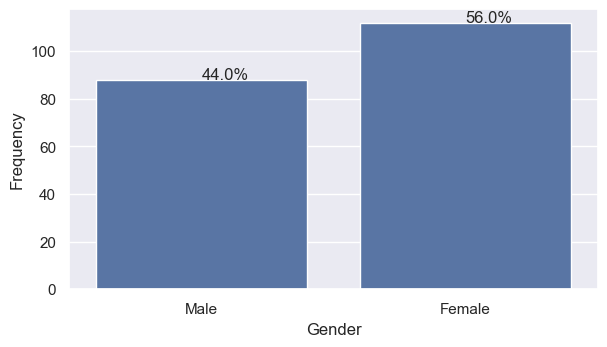

In [73]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

plt.figure(figsize=(15,8)) #perintah utk membuat object figure (gambar) dg size 25x18 inch

plt.subplot(2,2,1) #membuat subplot 2x2 pada indeks pertama
ax = sns.countplot(x=data['Gender']) #membuat plot jumlah dari kolom Gender 
plt.xlabel('Gender') #mengeset nama label sumbu x subplot 1
plt.ylabel('Frequency') #mengeset nama label sumbu y subplot 1
#fungsi utk menampilkan angka presentase tiap gender pada countplot
total = len(data['Gender'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width()/2
  y = p.get_y() + p.get_height() + 0.02
  ax.annotate(percentage, (x,y))




plt.show()

#### 4.How is the data distribution so that it can provide insight?

/var/folders/ww/91_wl_x96yz0tlrtl8z_qqvc0000gp/T/ipykernel_3098/2548895590.py:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/ww/91_wl_x96yz0tlrtl8z_qqvc0000gp/T/ipykernel_3098/2548895590.py:25: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/ww/91_wl_x96yz0tlrtl8z_qqvc0000gp/T/ipykernel_3098/25

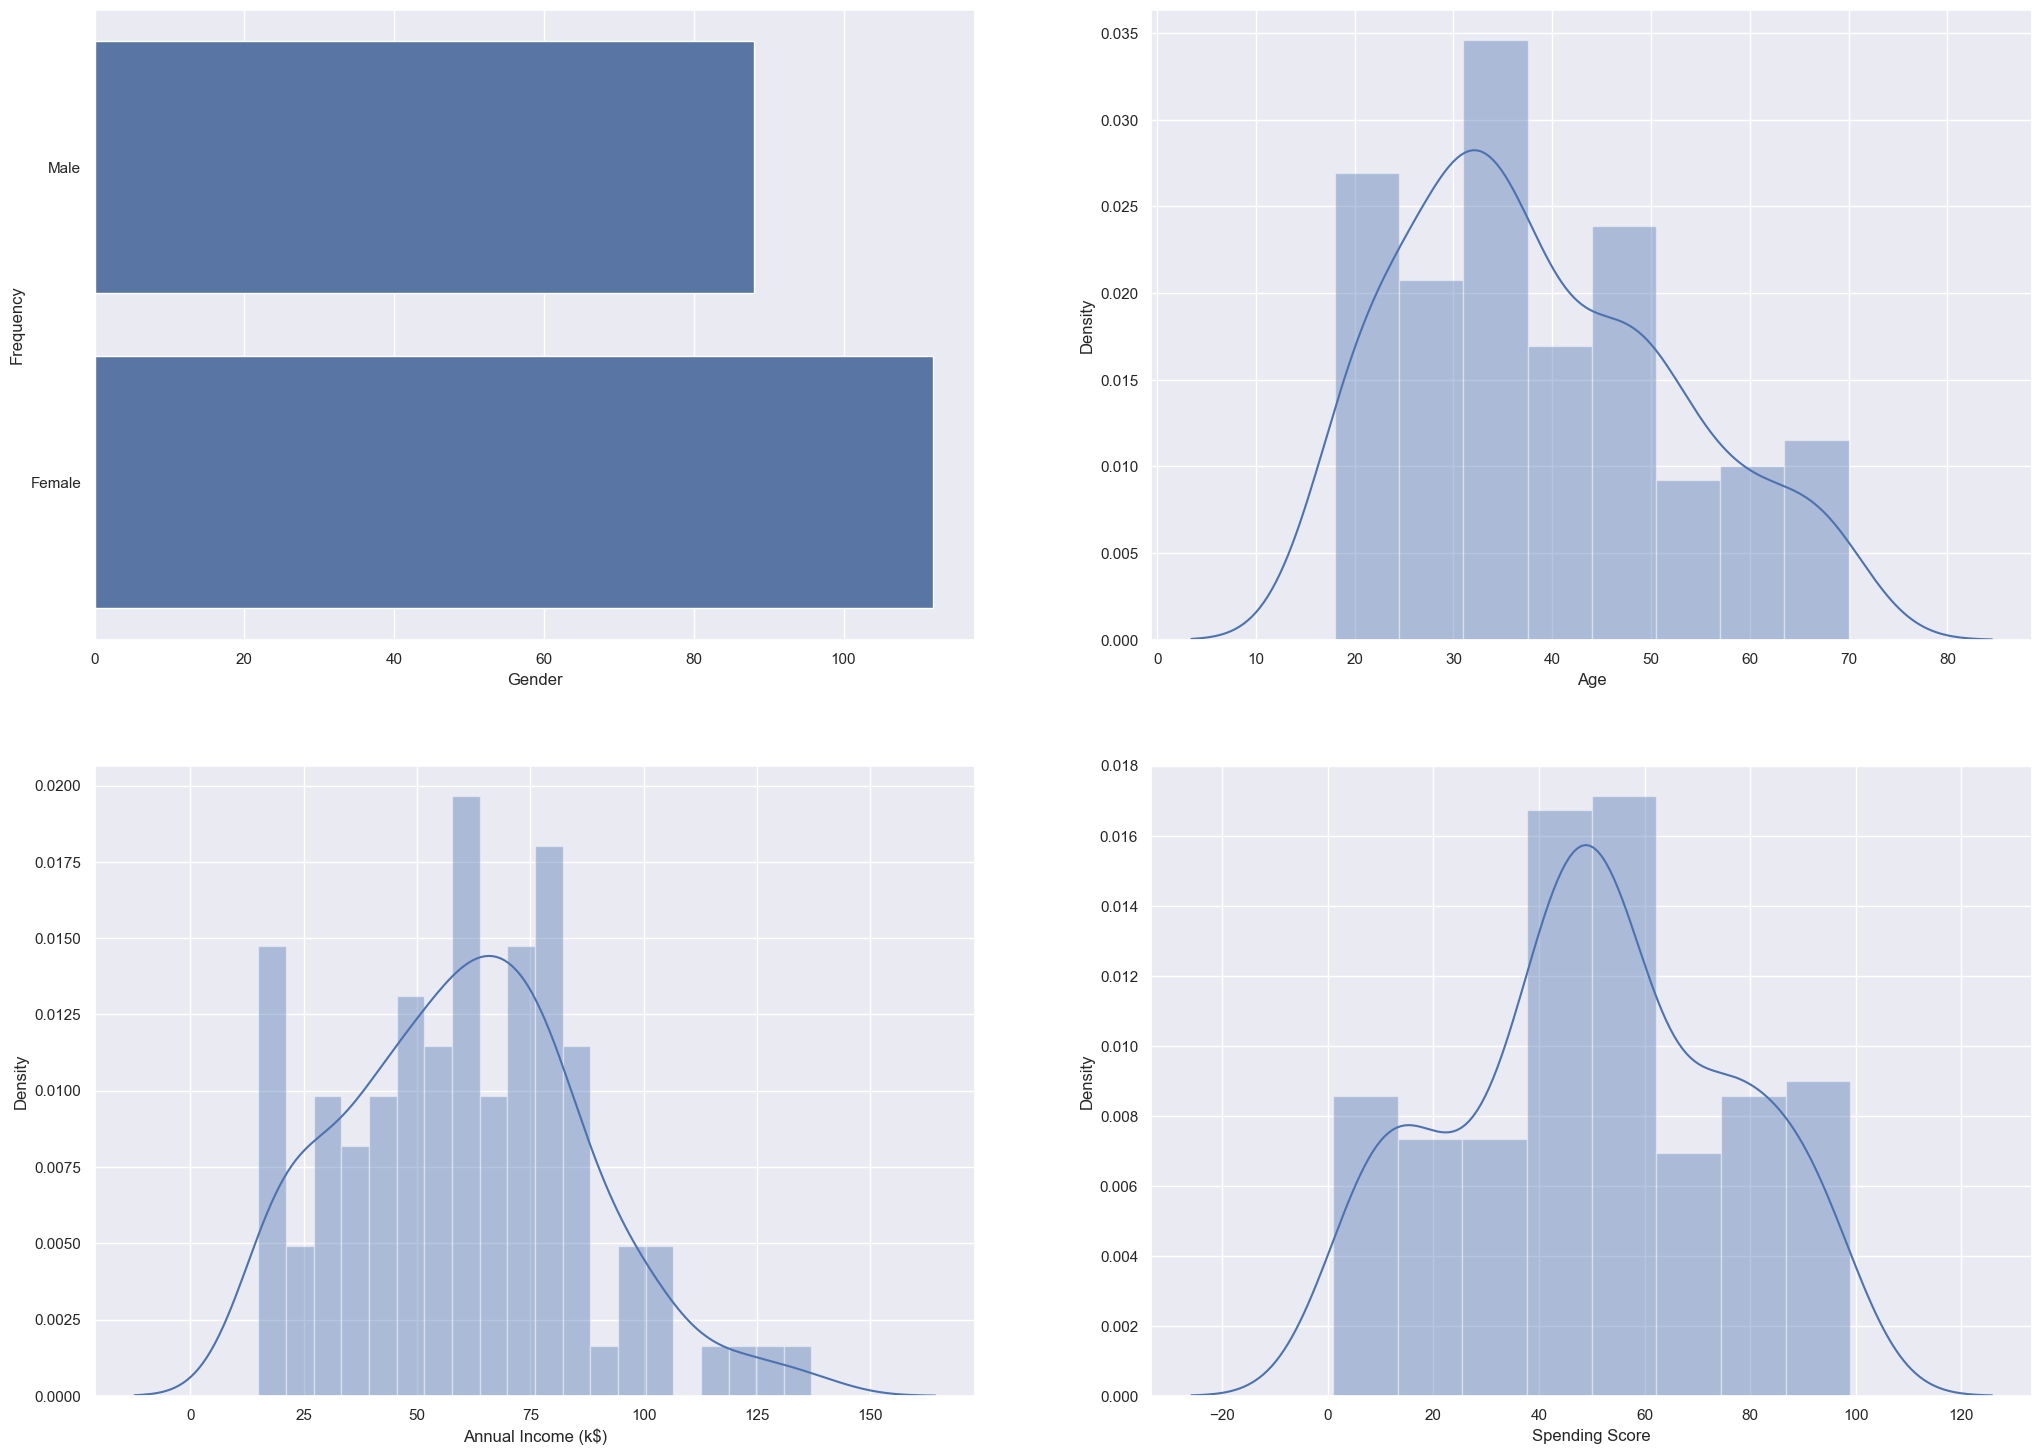

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

plt.figure(figsize=(25,18)) #perintah utk membuat object figure (gambar) dg size 25x18 inch

plt.subplot(2,2,1) #membuat subplot 2x2 pada indeks pertama
sns.countplot(data['Gender']) #membuat plot jumlah dari kolom Gender 
plt.xlabel('Gender') #mengeset nama label sumbu x subplot 1
plt.ylabel('Frequency') #mengeset nama label sumbu y subplot 1
#fungsi utk menampilkan angka presentase tiap gender pada countplot
total = len(data['Gender'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width()/2
  y = p.get_y() + p.get_height() + 0.02
  ax.annotate(percentage, (x,y))

plt.subplot(2,2,2) #membuat subplot 2x2 pada indeks kedua
sns.distplot(data['Age']) #membuat plot distribusi dari kolom Age
plt.xlabel('Age')
plt.ylabel('Density')

plt.subplot(2,2,3)
sns.distplot(data['Annual Income (k$)'], bins=20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')

plt.subplot(2,2,4)
sns.distplot(data['Spending Score (1-100)'])
plt.xlabel('Spending Score')
plt.ylabel('Density')

plt.show()

#### 5. In what age range are customers who shop at the mall?

Some information I got from here:
- Most customers are 30–40 years old. From the previous analysis
- the average age of customers is 39 years old
- and the most customers are 32 years old. Makes sense,
- Most customers have an annual income of $60,000–80,000
A spending score of 40–60 is the value that most customers have, quite around the average value of the overall customer spending score.

In [76]:
df_segm= data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].copy()

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df_segm)

#### 6. How many customer clusters are there at the mall?

In [82]:
df_result = df_segm.copy() #menyalin DataFrame df_segm ke DataFrame baru df_segm_result
df_result['Segment K-Means'] = kmeans.labels_ #menambahkan labels tiap data hasil kmeans clustering ke kolom baru 'Segment K-Means' ke Dataframe

df_analysis = df_result.groupby(['Segment K-Means']).mean() #membuat DataFrame baru df_segm_analysis berisi nilai mean dari DataFrame df_segm_result dan mengelompokkannya berdasarkan segmen
df_analysis['Frequency'] = df_result[['Segment K-Means', 'Age']].groupby(['Segment K-Means']).count() #buat kolom baru 'Frequency' berisi jumlah orang pada Segment tsb dan mengelompokkannya brdsrkan segmen
df_analysis['Percentage'] = df_analysis['Frequency']/df_analysis['Frequency'].sum() #buat kolom baru 'Percentage' berisi nilai presentase jumlah orang pada segment tersebut dibandingkan data keseluruhan 

df_analysis #menampilkan DataFrame df_segm_analysis

,Age,Annual Income (k$),Spending Score (1-100),Frequency,Percentage
Segment K-Means,,,,,
0,42.716049,55.296296,49.518519,81,0.405
1,32.692308,86.538462,82.128205,39,0.195
2,41.114286,88.200000,17.114286,35,0.175
3,45.217391,26.304348,20.913043,23,0.115
4,25.272727,25.727273,79.363636,22,0.110


In [87]:
#5. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit_predict(X)

##### Result
The clustering results I display in a table with the table contents in the form of the average value of each feature/parameter in the segment, and grouped based on the clusters that have been created. In addition, I added two new columns in the form of Frequency and Percentage to display the number and percentage of customers in the cluster.

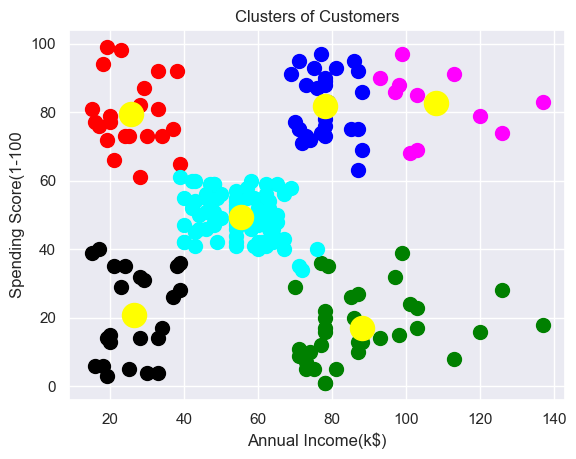

In [89]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 0')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 3')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 4')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='black', label ='Cluster 5')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()

##### Analysis
From the clustering results above, it can be seen that the cluster with the largest number of customers is segment 4. Segments 1 and 5 have almost the same number of members, and segment 0 has the fewest members, which is 21 people. Some of the characters, nicknames for each segment, and conclusions that I draw include:
- Segment 0 has a low average spending score, relatively low annual income compared to other segments, and an average age of 45 years. Fewer opportunity
- Segment 1 has the highest average spending score compared to other segments. Annual income is relatively high compared to others. Good opportunity. With this character and the relatively high number of cluster members, this segment is the best target market. Products that are suitable for this segment are products for adults aged 32 years. I think procuring new products that are often purchased by people with this segment character is an idea that can be considered. Changes in product prices (which are still rational and in accordance with product quality of course) will not affect the purchasing power and attractiveness of this segment too much.
- Segment 2 has a high average income compared to other segments, but its spending score is the lowest. The average age of this segment is slightly above average (41 years). Thrifty people. The buy 1 get 1 free product promo trick may be able to stimulate the attraction of segment members to give more of their income (which is relatively higher than other segments) to shop. No offense please.
- Segment 3 is on average young people with low income (the lowest compared to others) but with a spending score that is quite high above average (average spending score 50.2 from the previous analysis). Consumptive young people 😮. Products with relatively cheap prices are good products to maintain this segment.
- Segment 4 is the segment with the largest number of members with moderate spending score and annual income (close to average) and above average age (average age = 30–40 years). Standard old people.
- Segment 5 is a segment with a moderate spending score and income but the average age of its members is young people aged 26 years. Standard young people. The overall character of this segment is almost the same as segment 4, except that this segment consists of many younger people. The last two segments (segments 4 and 5) are standard segments that I think the Mall should be able to maintain. There is nothing wrong with trying to introduce new products to this segment (of course products that suit their age character). However, it should be noted that perhaps the determination and slight changes in the price of the products that this segment buys can affect their purchasing power.



In [84]:
df_analysis.rename({0: 'Fewer opportunities',
                    1: 'Good opportunities',
                    2: 'Thrifty group',
                    3: 'Consumptive young group',
                    4: 'Standard older people',
                    5: 'Standard younger people'})

,Age,Annual Income (k$),Spending Score (1-100),Frequency,Percentage
Segment K-Means,,,,,
Fewer opportunities,42.716049,55.296296,49.518519,81,0.405
Good opportunities,32.692308,86.538462,82.128205,39,0.195
Thrifty group,41.114286,88.200000,17.114286,35,0.175
Consumptive young group,45.217391,26.304348,20.913043,23,0.115
Standard older people,25.272727,25.727273,79.363636,22,0.110
